In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('csi_data_tw2.csv')

<Axes: >

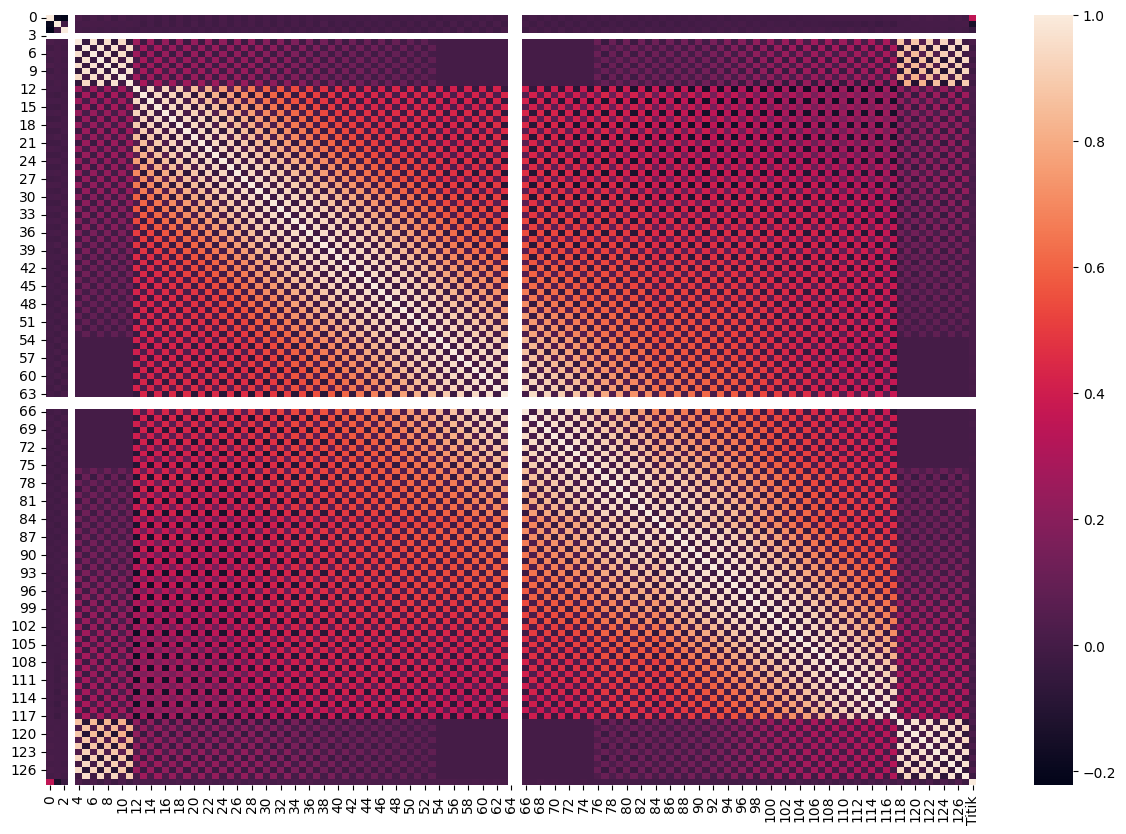

In [3]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=False, fmt='.2f')

In [4]:
# Filter data dengan kelas
df = df[~df['Titik'].isin([0, 1, 2, 3])]
# df = df[~df['Titik'].isin([0])]
df

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Titik
0,106,32,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,110,96,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,-125,48,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
5,30,-32,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
7,-64,0,12,0,-29,-5,-33,-3,-26,-2,...,1,-32,-5,-30,-1,-31,3,-34,-4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,-125,48,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
6984,-64,0,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
6987,-42,-30,44,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
6988,-114,-32,8,0,-6,27,-7,26,-4,26,...,26,-6,27,-7,26,-7,28,-10,29,9


In [5]:
# label_mapping = {0: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6}
label_mapping = {4: 0, 5: 1, 6: 2, 7: 3, 8: 4, 9: 5}
# label_mapping = {1: 0, 2:1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8}
df['Titik'] = df['Titik'].map(label_mapping)
df

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Titik
0,106,32,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,110,96,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,-125,48,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5,30,-32,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
7,-64,0,12,0,-29,-5,-33,-3,-26,-2,...,1,-32,-5,-30,-1,-31,3,-34,-4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,-125,48,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
6984,-64,0,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6987,-42,-30,44,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6988,-114,-32,8,0,-6,27,-7,26,-4,26,...,26,-6,27,-7,26,-7,28,-10,29,5


In [6]:
X = df.drop(columns=['Titik','3','64','65'])
y = df['Titik']

In [7]:
def standard_scaler(data):
    return (data - np.mean(data)) / np.std(data)

In [8]:
# for col in X.columns:
#     unique_val = len(X[col].value_counts())
#     # print(f"Nilai unik fitur {col}: ", unique_val)
#     if unique_val < 2:
#         X = X.drop(columns=col)

In [9]:
for cols in X.columns:
    X[cols] = standard_scaler(X[cols])

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_split, y_train, y_split = train_test_split(X, y, test_size=0.2, random_state=142, stratify=y)

X_val, X_test, y_val, y_test = train_test_split(X_split, y_split, test_size=0.3, random_state=142, stratify=y_split)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2

num_classes = 6

# Membuat model
model = Sequential([
    Dense(256, activation='relu', input_dim=125, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(num_classes, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               32256     
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/100


27/27 [==============================] - 2s 15ms/step - loss: 6.2365 - accuracy: 0.2346 - val_loss: 5.5797 - val_accuracy: 0.2811
Epoch 2/100
27/27 [==============================] - 0s 6ms/step - loss: 5.5199 - accuracy: 0.3419 - val_loss: 5.1643 - val_accuracy: 0.3969
Epoch 3/100
27/27 [==============================] - 0s 6ms/step - loss: 5.0973 - accuracy: 0.3747 - val_loss: 4.7869 - val_accuracy: 0.4497
Epoch 4/100
27/27 [==============================] - 0s 7ms/step - loss: 4.6748 - accuracy: 0.4244 - val_loss: 4.4351 - val_accuracy: 0.4906
Epoch 5/100
27/27 [==============================] - 0s 6ms/step - loss: 4.3443 - accuracy: 0.4432 - val_loss: 4.1293 - val_accuracy: 0.5043
Epoch 6/100
27/27 [==============================] - 0s 6ms/step - loss: 4.0161 - accuracy: 0.4686 - val_loss: 3.8644 - val_accuracy: 0.5196
Epoch 7/100
27/27 [==============================] - 0s 6ms/step - loss: 3.7257 - accuracy: 0.4703 - val_loss: 3.6290 - val_accuracy: 0.4991
Epoch 8/100
27/27 [=====

In [14]:
import numpy as np
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Menghitung classification report
report = classification_report(y_test, y_pred_classes)
print(report)

8/8 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.65      0.76      0.70        42
           1       0.76      0.88      0.81        42
           2       0.56      0.64      0.60        42
           3       0.59      0.52      0.56        42
           4       0.64      0.64      0.64        42
           5       0.78      0.50      0.61        42

    accuracy                           0.66       252
   macro avg       0.66      0.66      0.65       252
weighted avg       0.66      0.66      0.65       252



In [15]:
# Evaluasi model yang belum dibungkus pada contoh adversarial yang dihasilkan
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Akurasi val: {accuracy*100:.2f}%')

8/8 [==============================] - 0s 2ms/step - loss: 1.0956 - accuracy: 0.6587
Akurasi val: 65.87%
